In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from ultralytics import YOLO

Part A

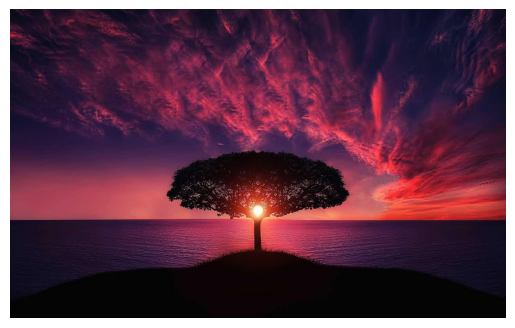

In [2]:
img = cv2.imread('/Users/anantasati/Desktop/tree-736885_1280.jpg')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors in Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

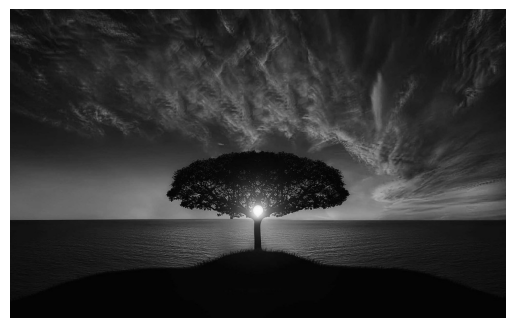

In [3]:
img_grey = cv2.imread('/Users/anantasati/Desktop/tree-736885_1280.jpg',cv2.IMREAD_GRAYSCALE) 
img_grey = cv2.cvtColor(img_grey, cv2.COLOR_BGR2RGB)
plt.imshow(img_grey)
plt.axis('off')  # Hide axes
plt.show()

Gaussian Blurring:Gaussian blur is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. It is also used as a preprocessing stage before applying our machine learning or deep learning models


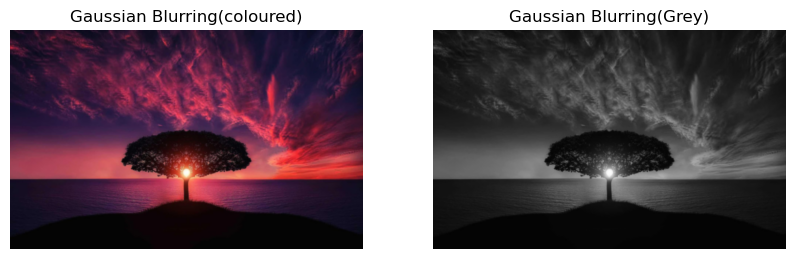

In [4]:
Gaussian = cv2.GaussianBlur(img, (7, 7), 0) 
Gaussian_grey = cv2.GaussianBlur(img_grey, (7, 7), 0) 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(Gaussian)  
axes[1].imshow(Gaussian_grey)  
axes[0].set_title('Gaussian Blurring(coloured)')
axes[1].set_title('Gaussian Blurring(Grey)')
axes[0].axis('off') 
axes[1].axis('off')
plt.show()

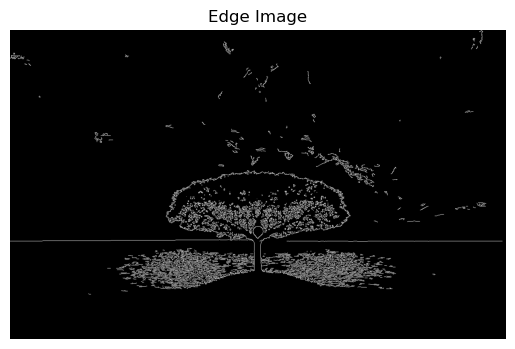

In [5]:
edges = cv2.Canny(img_grey,100,200)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.axis('off')
 
plt.show()


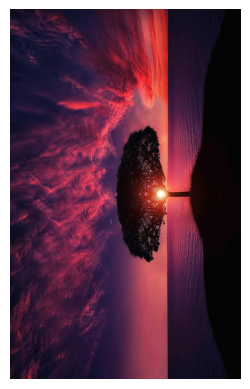

In [6]:
img_rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(img_rotated )
plt.axis('off')
plt.show()

Part B

In [7]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
X_train = X_train/255 
X_test = X_test/255
print(Y_test)

[7 2 1 ... 4 5 6]


In [8]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of Y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of Y_test:  (10000,)


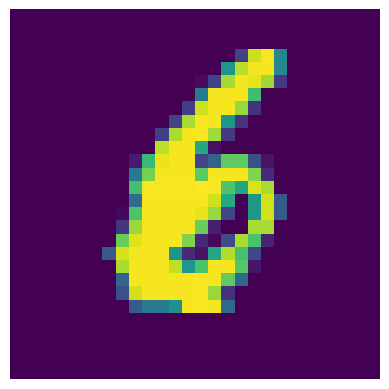

In [9]:
i = 129
plt.imshow(X_train[i])
plt.axis('off')
plt.show()

In [238]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = 'relu',input_shape=(28,28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(32, (3,3), activation = 'sigmoid'),
    keras.layers.MaxPooling2D((2,2)),  
    keras.layers.Conv2D(32, (3,3), activation = 'sigmoid'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation = 'softmax')
])

In [11]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
model.fit(X_train, Y_train, epochs = 5, batch_size =32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6584 - loss: 1.2537
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9516 - loss: 0.1906
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9678 - loss: 0.1175
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9745 - loss: 0.0876
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9782 - loss: 0.0735


In [13]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0802


[0.06863068044185638, 0.9787999987602234]

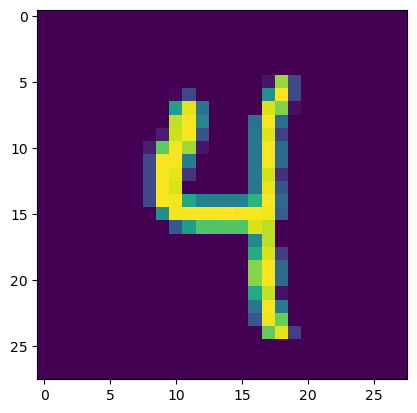

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
4


In [14]:
i = random.randint(0, len(Y_test))
plt.imshow(X_test[i])
plt.show()

y_pred = model.predict(X_test[i].reshape(1, 28,28,1))
predicted_class = np.argmax(y_pred)  
print(predicted_class)

PART C

100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 20.9MB/s]



image 1/1 /Users/anantasati/Desktop/IMG-20241118-WA0216.jpg: 640x480 2 persons, 2 cups, 1 donut, 1 dining table, 1 vase, 124.5ms
Speed: 10.5ms preprocess, 124.5ms inference, 71.7ms postprocess per image at shape (1, 3, 640, 480)


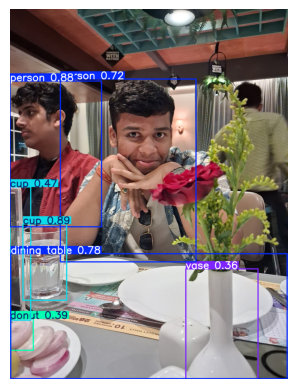

In [15]:
model = YOLO("yolov8n.pt")
# Perform object detection
results = model.predict("/Users/anantasati/Desktop/IMG-20241118-WA0216.jpg", device="mps") 

# Show results
for r in results:
    im_array = r.plot()  # Draw boxes on image
    plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()



image 1/1 /Users/anantasati/Desktop/PHOTO-2025-03-27-00-28-02.jpg: 640x544 7 persons, 2 cups, 1 sandwich, 1 pizza, 1 dining table, 158.4ms
Speed: 9.8ms preprocess, 158.4ms inference, 268.3ms postprocess per image at shape (1, 3, 640, 544)


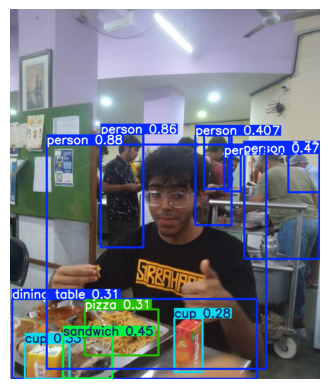

In [16]:
results = model.predict("/Users/anantasati/Desktop/PHOTO-2025-03-27-00-28-02.jpg", device="mps")  

# Show results
for r in results:
    im_array = r.plot()  # Draw boxes on image
    plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()



image 1/1 /Users/anantasati/Desktop/Clutter-hero.jpg: 352x640 1 person, 1 frisbee, 1 bed, 1 tv, 1 laptop, 133.2ms
Speed: 4.1ms preprocess, 133.2ms inference, 37.7ms postprocess per image at shape (1, 3, 352, 640)


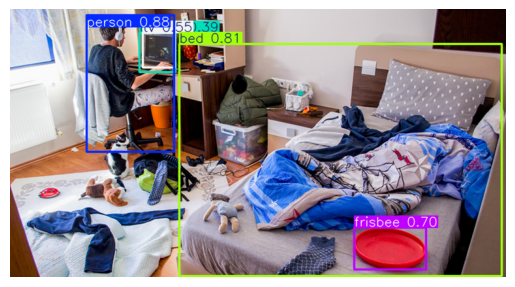

In [17]:

results = model.predict("/Users/anantasati/Desktop/Clutter-hero.jpg", device="mps")  

# Show results
for r in results:
    im_array = r.plot()  # Draw boxes on image
    plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


PART D

In [230]:
img_1 =  cv2.imread('/Users/anantasati/Desktop/Screenshot 2025-03-27 at 10.20.15 AM.png')
cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_grey_1 = cv2.imread('/Users/anantasati/Desktop/Screenshot 2025-03-27 at 10.20.15 AM.png',cv2.IMREAD_GRAYSCALE) 
blurred_1 = cv2.GaussianBlur(img_grey, (9, 9), 0)

In [239]:
circles = cv2.HoughCircles(blurred_1, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=80, param2=60, minRadius=30, maxRadius=200)
print("Detected Circles:", circles)


Detected Circles: [[[      108.6       114.6       78.72]]]


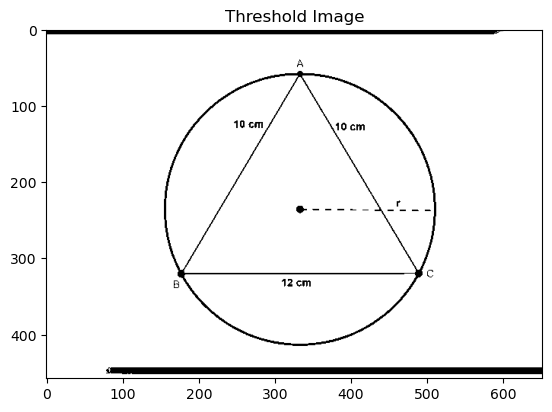

[array([[[181, 317]],

       [[485, 315]],

       [[332,  63]]], dtype=int32)]


In [244]:
_, thresh = cv2.threshold(img_grey_1, 160, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(thresh, cmap='gray')
plt.title("Threshold Image")
plt.show()


triangles = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 3:  # If it's a triangle
        triangles.append(approx)
print(triangles)

In [245]:
def is_triangle_inside_circle(triangle, circle):
    cx, cy, r = circle
    for point in triangle:
        px, py = point[0]
        if (px - cx) ** 2 + (py - cy) ** 2 > r ** 2:
            return True


In [246]:
# Draw Circles and Triangles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        cx, cy, r = circle
        cv2.circle(img_1, (cx, cy), r, (0, 255, 0), 2)  # Draw the detected circle

        for triangle in triangles:
            if is_triangle_inside_circle(triangle, (cx, cy, r)):
                cv2.drawContours(img_1, [triangle], -1, (255, 0, 0), 2)  # Mark triangle
                cv2.circle(img_1, (cx, cy), r, (0, 0, 255), 2)  # Highlight the containing circle


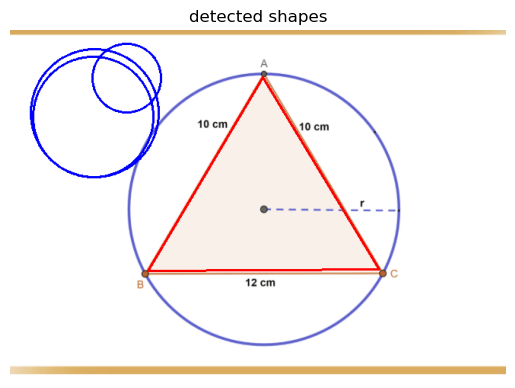

In [247]:
plt.imshow(img_1)
plt.title("detected shapes")
plt.axis("off")
plt.show()

In [248]:
img_1 =  cv2.imread('/Users/anantasati/Desktop/Unknown.png')
cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_grey_1 = cv2.imread('/Users/anantasati/Desktop/Unknown.png',cv2.IMREAD_GRAYSCALE) 
blurred_1 = cv2.GaussianBlur(img_grey, (9, 9), 0)


Detected Circles: [[[      108.6         111       84.48]
  [        153        64.2       45.48]]]


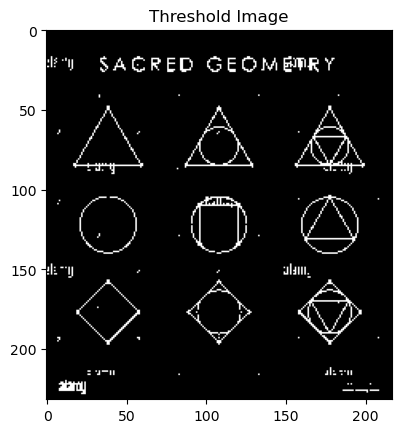

detected triangles
[array([[[ 57, 193]],

       [[ 58, 194]],

       [[ 58, 193]]], dtype=int32), array([[[166, 171]],

       [[189, 171]],

       [[178, 189]]], dtype=int32), array([[[177, 106]],

       [[191, 131]],

       [[163, 130]]], dtype=int32), array([[[108,  48]],

       [[ 87,  86]],

       [[129,  86]]], dtype=int32), array([[[38, 50]],

       [[58, 85]],

       [[18, 84]]], dtype=int32)]


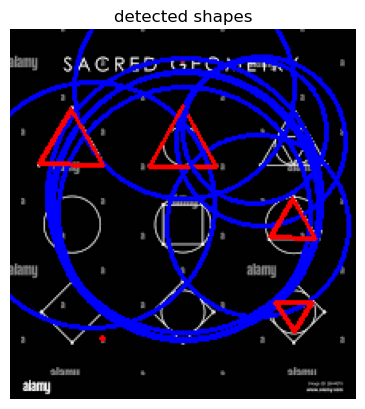

In [256]:
circles = cv2.HoughCircles(blurred_1, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=50, param2=50, minRadius=30, maxRadius=200)
print("Detected Circles:", circles)
_, thresh = cv2.threshold(img_grey_1, 120, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(thresh, cmap='gray')
plt.title("Threshold Image")
plt.show()


triangles = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 3:  # If it's a triangle
        triangles.append(approx)
print("detected triangles")
print(triangles)
def is_triangle_inside_circle(triangle, circle):
    cx, cy, r = circle
    for point in triangle:
        px, py = point[0]
        if (px - cx) ** 2 + (py - cy) ** 2 > r ** 2:
            return True
# Draw Circles and Triangles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        cx, cy, r = circle
        cv2.circle(img_1, (cx, cy), r, (0, 255, 0), 2)  # Draw the detected circle

        for triangle in triangles:
            if is_triangle_inside_circle(triangle, (cx, cy, r)):
                cv2.drawContours(img_1, [triangle], -1, (255, 0, 0), 2)  # Mark triangle
                cv2.circle(img_1, (cx, cy), r, (0, 0, 255), 2)  # Highlight the containing circle
plt.imshow(img_1)
plt.title("detected shapes")
plt.axis("off")
plt.show()